In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns

/tmp/ipykernel_17478/3784489319.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from cdcp.experiment_info import subjects
from cdcp.paths import DATA_PATH_MAGPI, DATA_DIR
from cdcp.behavior.data import prepare_behavior_data
from cdcp.visualization.colors import colors
subjects, DATA_PATH_MAGPI

(('B1174',
  'B1426',
  'B1170',
  'B1432',
  'B1437',
  'B1433',
  'B1597',
  'B1427',
  'B1188',
  'B1244',
  'B1590',
  'B1399',
  'B1591',
  'B1252',
  'B1110',
  'B1390',
  'B1248',
  'B1593',
  'B1595',
  'B1276'),
 PosixPath('/mnt/cube/RawData/Magpi'))

In [4]:
# pickled dataframes
stim_df = pd.read_pickle(DATA_DIR / 'stimuli' / 'stim_df.pickle.zip' , compression='zip')

In [5]:
stim_df[:3]

,stims,idx,z,x,recon_x,syll_wav,wav_file,stim_length,syll_start,bird,datetime,generated_audio
A,A,0,"[-1.5310783386230469, 0.15899673104286194, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.354109710722696e-05, 2.357472340008826e-06,...","[-18, -21, -18, -19, -23, -16, -15, -24, -17, ...",../../data/interim/st_wavs/b1077/wavs/2018-01-...,0.606612,1853779.625,b1077,05/01/18 13:33:29.485819,"[6, 2, -5, -7, -12, -5, 0, 1, 13, 2, 6, 20, 24..."
B,B,1,"[1.0914186239242554, -0.4693475067615509, -1.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.042301386813051e-06, 7.268283184203028e-07,...","[-69, -71, -58, -53, -42, -45, -37, -50, -64, ...",../../data/interim/st_wavs/b1159/wavs/2018-04-...,0.311291,1481033.000,b1159,21/04/18 18:13:16.363514,"[-2, 0, -16, -54, -57, -23, -42, -44, -62, -49..."
C,C,2,"[1.3686274290084839, 1.2882750034332275, -0.63...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.574187132926454e-07, 4.783260010299273e-08,...","[22, 20, 26, 25, 15, 12, 12, 15, 15, 26, 34, 2...",../../data/interim/st_wavs/B338/wavs/2008-05-0...,0.309285,1494092.875,B338,04/05/08 18:56:33.879657,"[0, 3, 6, 0, 2, 4, 14, 19, 20, 22, 27, 28, 27,..."


In [32]:
stims = ['CR1', 'CR0', 'CN', 'CL0', 'CL1'] # 'D', 'H', 

In [33]:
pad_length = int(44100 / 2)
audio_of_cues = np.concatenate([np.concatenate([(stim_df[stim_df.stims == stim].iloc[0].generated_audio), np.zeros(pad_length)]) for stim in stims])

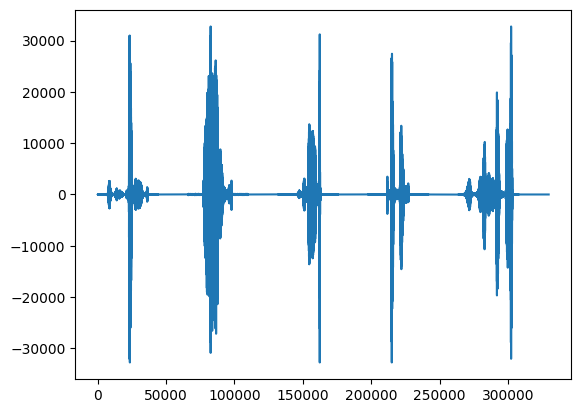

In [34]:
plt.plot(audio_of_cues)

In [35]:
import IPython.display as ipd

In [36]:
ipd.Audio(audio_of_cues, rate = 44100) # load a local WAV file

In [40]:
n_interp = 8

In [41]:
L_STIMS = ['A', 'B', 'C']
R_STIMS = ['E', 'F', 'G']

In [42]:
interp_dfs = np.array(list((DATA_DIR / 'stimuli').glob('interp_df*')))

In [48]:
from cdcp.paths import DATA_PATH_MAGPI, FIGURE_DIR, ensure_dir
from cdcp.general import save_fig

In [49]:
import scipy.io

In [55]:
for LS in L_STIMS:
    for RS in R_STIMS:
        file = interp_dfs[
            (
                (np.array([i.stem[:-7].split("_")[2] for i in interp_dfs]) == LS)
                & (np.array([i.stem[:-7].split("_")[3] for i in interp_dfs]) == RS)
            )
        ][0]
        print(file)
        interp_df_subset = pd.read_pickle(file, compression="zip")

        interp_df_subset_pts = interp_df_subset[
            interp_df_subset.pt.isin(np.linspace(0, 127, n_interp).astype("int"))
        ][::-1]

        pad_length = int(44100 / 2)
        audio = np.concatenate([np.concatenate([i, np.zeros(pad_length)]) for i in interp_df_subset_pts.audio.values])
        
        print(LS, RS)
        
        ensure_dir(FIGURE_DIR / 'audio')

        scipy.io.wavfile.write(filename = FIGURE_DIR / 'audio' / f"{LS}_{RS}.wav", rate=44100, data=audio.astype('int16'))
        #ipd.Audio(audio, rate = 44100) # load a local WAV file

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_A_E.pickle.zip
A E
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_A_F.pickle.zip
A F
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_A_G.pickle.zip
A G
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_B_E.pickle.zip
B E
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_B_F.pickle.zip
B F
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_B_G.pickle.zip
B G
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_C_E.pickle.zip
C E
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_C_F.pickle.zip
C F
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_C_G.pickle.zip
C G


In [46]:
ipd.Audio(audio, rate = 44100) # load a local WAV file